In [1]:
!pip install pingouin
!pip install datasist
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=3e6730a90e354628a87226ab5337c6f9304fc045e4c81fba2f17b6eef0045b6b
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(18,8)},style='darkgrid')
sns.set_palette('rocket')
from time import time
import pingouin
from scipy.stats import ttest_ind
from datasist.structdata import detect_outliers
from geopy.distance import great_circle
from category_encoders import WOEEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [50]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fraudTrain.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fraudTest.csv")
train = train.drop(train.columns[0], axis=1)
test = test.drop(test.columns[0],axis=1)
train

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [52]:
train['split'] = 'train'
test['split']='test'
df = pd.concat([train,test],axis=0).reset_index(drop=True)
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,split
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,train
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,train
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,train
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,test
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,test
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,test
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,test


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
 22  split             

In [7]:
#Check Nulls
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
split                    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
#Drop unnecessary columns
#We will drop lcoation of customer as we will get the distance between
#Merchant and customer location later
df.drop(columns=['street','state','first','last','trans_num','unix_time'],inplace=True)

In [10]:
#Extract features from 'trans_date_trans_time'
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month


In [11]:
#Date of birth --> Age of customer
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d %H:%M:%S')
df['age'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year).astype(int)
df.drop(columns='dob',inplace=True)

In [12]:
#Location between customer home and merchant
df['distance_km'] = df.apply(lambda col : round(great_circle((col['lat'],col['long']),
                                         (col['merch_lat'],col['merch_long'])).kilometers,2),axis=1)

In [13]:
#Drop the proccesed columns
df.drop(columns=['lat','long','merch_lat','merch_long'],inplace=True)


In [14]:
#clean merchant column
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [15]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,is_fraud,split,hour,day,month,age,distance_km
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,3495,"Psychologist, counselling",0,train,0,Tuesday,1,31,78.60
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,149,Special educational needs teacher,0,train,0,Tuesday,1,41,30.21
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,M,Malad City,83252,4154,Nature conservation officer,0,train,0,Tuesday,1,57,108.21
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,1939,Patent attorney,0,train,0,Tuesday,1,52,95.67
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,99,Dance movement psychotherapist,0,train,0,Tuesday,1,33,77.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,Reilly and Sons,health_fitness,43.77,M,Luray,63453,519,Town planner,0,test,23,Thursday,12,54,77.03
1852390,2020-12-31 23:59:09,3556613125071656,Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,77566,28739,Futures trader,0,test,23,Thursday,12,21,100.07
1852391,2020-12-31 23:59:15,6011724471098086,Rau-Robel,kids_pets,86.88,F,Burbank,99323,3684,Musician,0,test,23,Thursday,12,39,80.76
1852392,2020-12-31 23:59:24,4079773899158,Breitenberg LLC,travel,7.99,M,Mesa,83643,129,Cartographer,0,test,23,Thursday,12,55,52.93


In [49]:
value_counts = df['cc_num'].value_counts()
most_frequent_value = value_counts.idxmax()
frequency = value_counts.max()

print(f"The most frequent value in 'cc_num' is: {most_frequent_value}")
print(f"It occurs {frequency} times.")


The most frequent value in 'cc_num' is: 6538441737335434
It occurs 4392 times.


In [46]:
#Summary stats
df.describe(include = 'all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
trans_date_trans_time,1852394,1819551,2019-04-22 16:02:01,4,2019-01-01 00:00:18,2020-12-31 23:59:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_num,1852394.0,NaN,NaN,NaN,NaT,NaT,417386038393710400.0,1309115265318734848.0,60416207185.0,180042946491150.0,3521417320836166.0,4642255475285942.0,4992346398065154048.0
merchant,1852394,693,Kilback LLC,6262,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,1852394,14,gas_transport,188029,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt,1852394.0,NaN,NaN,NaN,NaT,NaT,70.063567,159.253975,1.0,9.64,47.45,83.1,28948.9
gender,1852394,2,F,1014749,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1852394,906,Birmingham,8040,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip,1852394.0,NaN,NaN,NaN,NaT,NaT,48813.258191,26881.845966,1257.0,26237.0,48174.0,72042.0,99921.0
city_pop,1852394.0,NaN,NaN,NaN,NaT,NaT,88643.674509,301487.618344,23.0,741.0,2443.0,20328.0,2906700.0
job,1852394,497,Film/video editor,13898,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('cc_num')
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['merchant', 'category', 'gender', 'city', 'job', 'split', 'day'], dtype='object')
Numerical Variables:
['amt', 'zip', 'city_pop', 'is_fraud', 'hour', 'month', 'age', 'distance_km']


amt
Skew: 40.81
Threshold for Outliers for amt: (-100.55, 193.29)
Number of Outliers for amt: 95054


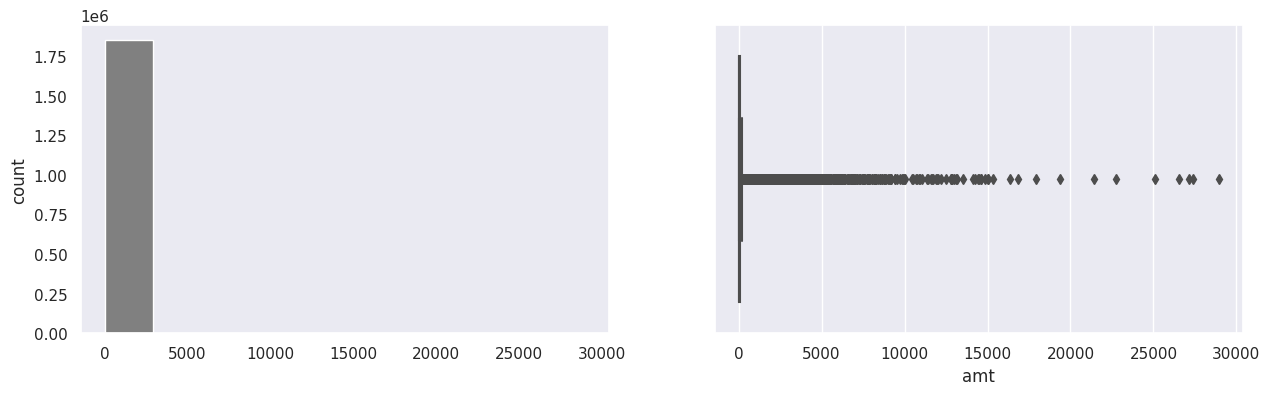

zip
Skew: 0.08
Threshold for Outliers for zip: (-42470.5, 140749.5)
Number of Outliers for zip: 0


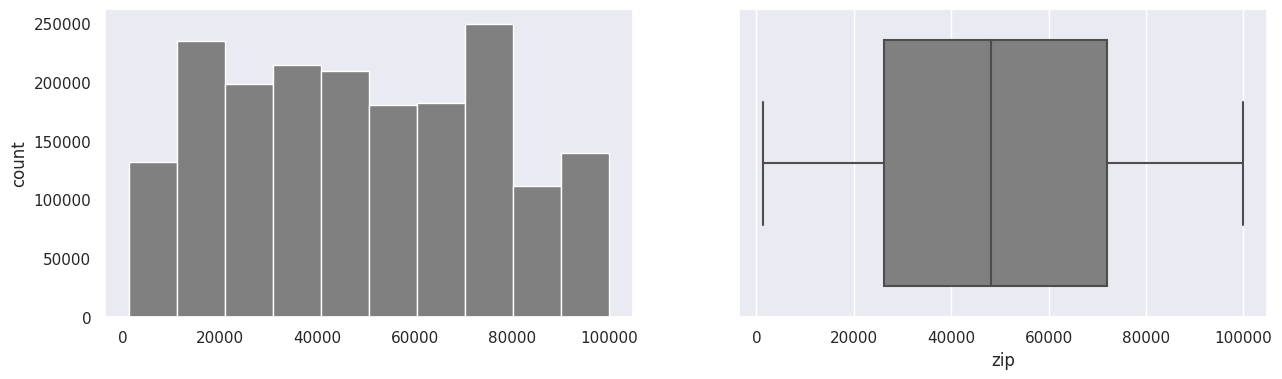

city_pop
Skew: 5.59
Threshold for Outliers for city_pop: (-28639.5, 49708.5)
Number of Outliers for city_pop: 346191


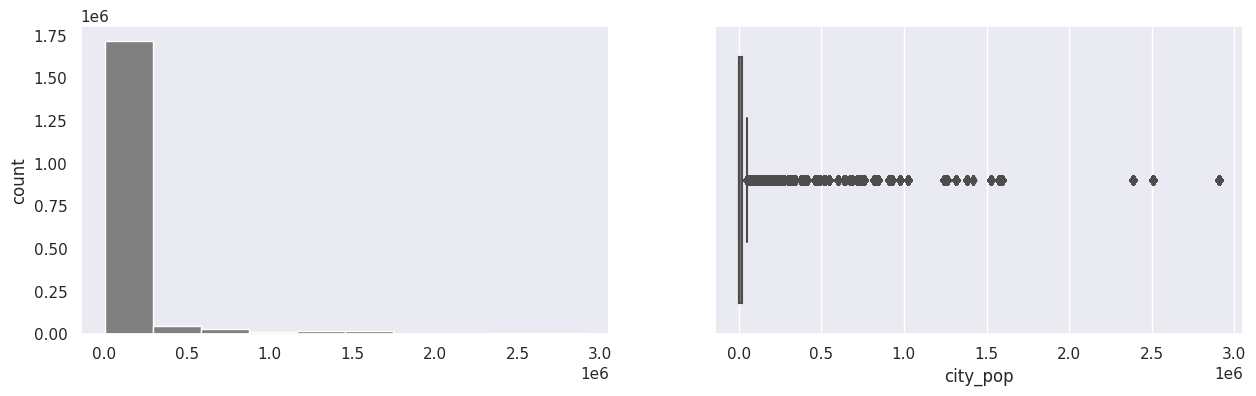

is_fraud
Skew: 13.75
Threshold for Outliers for is_fraud: (0.0, 0.0)
Number of Outliers for is_fraud: 9651


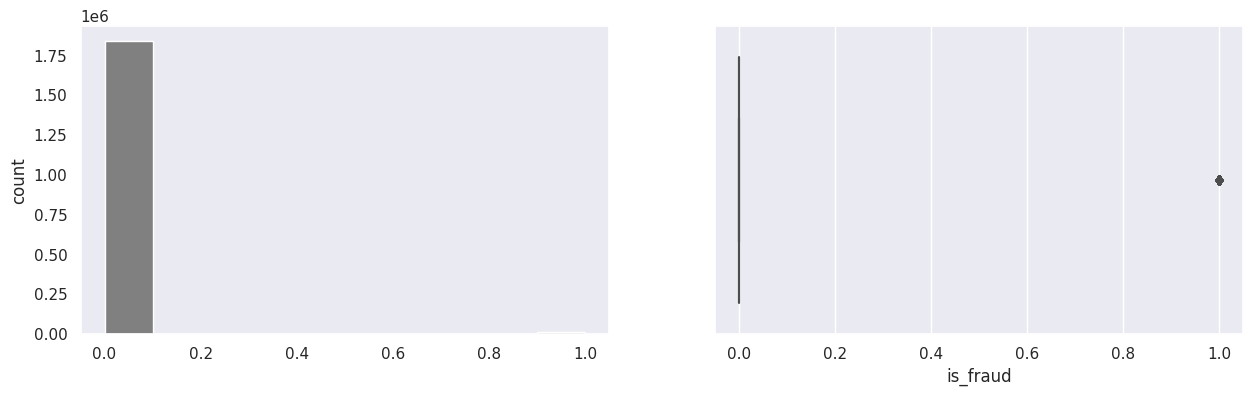

hour
Skew: -0.28
Threshold for Outliers for hour: (-11.0, 37.0)
Number of Outliers for hour: 0


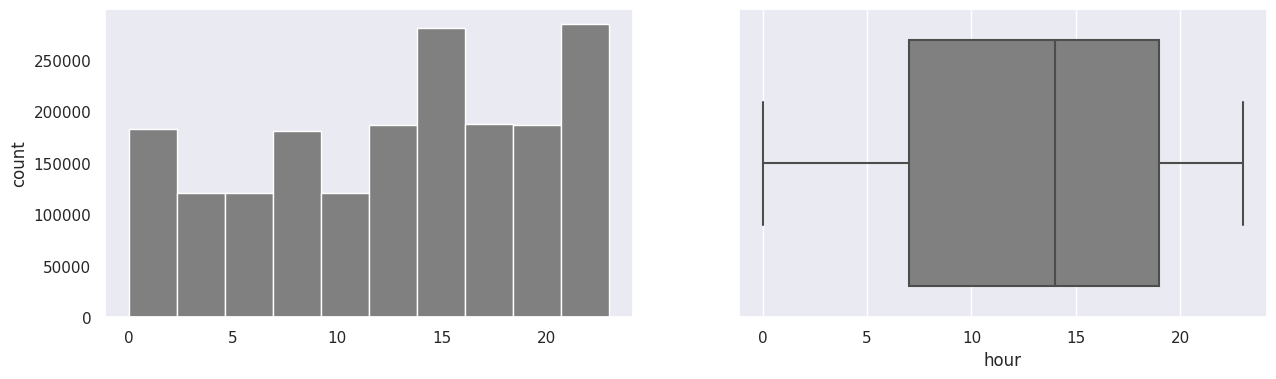

month
Skew: -0.13
Threshold for Outliers for month: (-5.0, 19.0)
Number of Outliers for month: 0


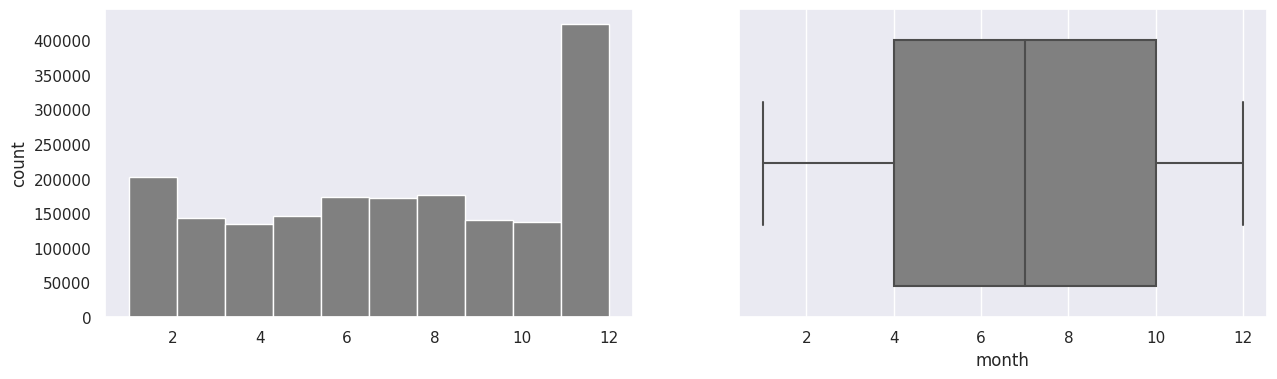

age
Skew: 0.61
Threshold for Outliers for age: (-3.0, 93.0)
Number of Outliers for age: 5177


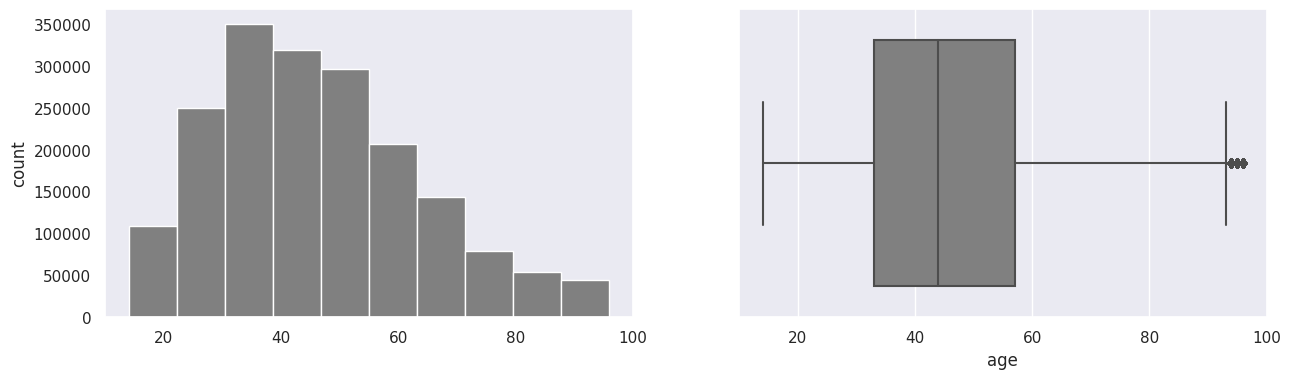

distance_km
Skew: -0.24
Threshold for Outliers for distance_km: (-9.46500000000001, 163.29500000000002)
Number of Outliers for distance_km: 0


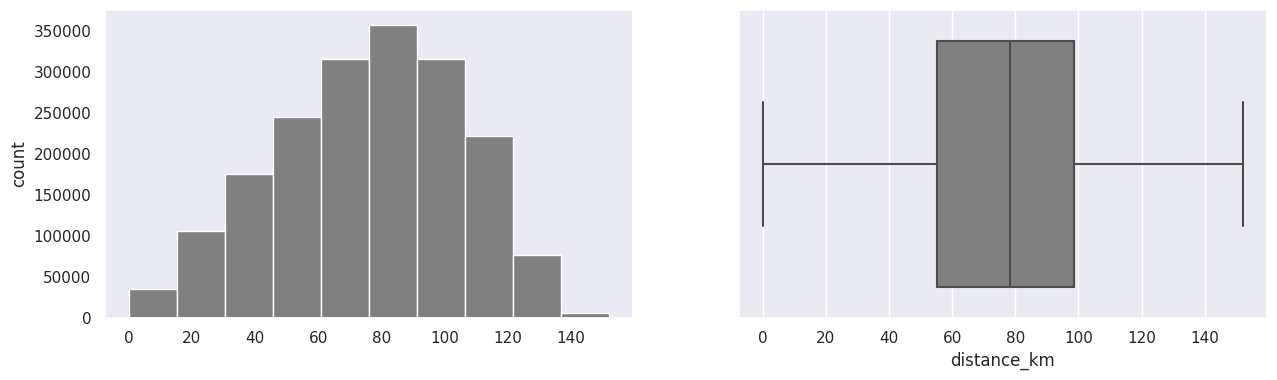

In [44]:
import numpy as np

for col in num_cols:
    print(col)
    print('Skew:', round(df[col].skew(), 2))

    plt.figure(figsize=(15, 4))

    # Histogram with grey color
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False, color='grey')  # Set color to grey
    plt.ylabel('count')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='grey')

    # Outliers detection and printing
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    print(f"Threshold for Outliers for {col}: ({lower_bound}, {upper_bound})")
    print(f"Number of Outliers for {col}: {len(outliers)}")

    plt.show()


amt
Skew: 0.03
Threshold for Outliers for amt : (-753.3599999999999, 1895.8)
Number of Outliers for amt: 0


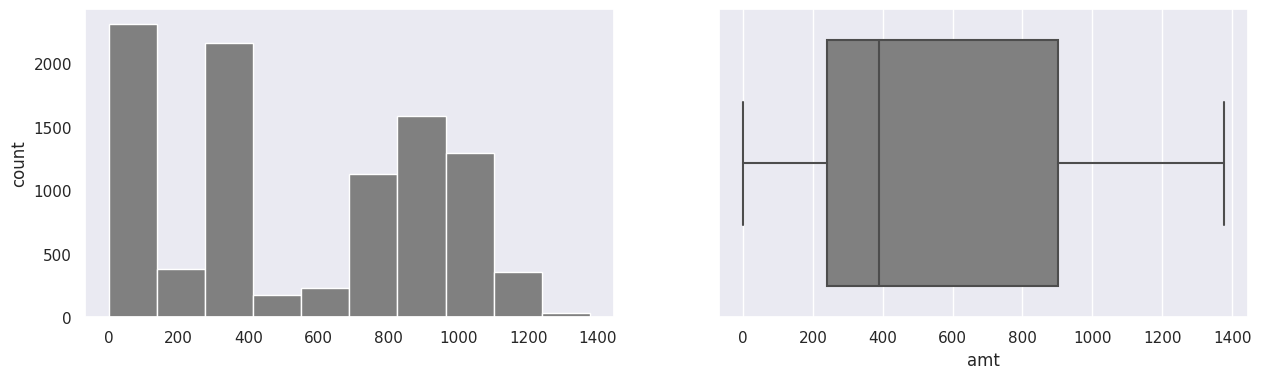

zip
Skew: 0.15
Threshold for Outliers for zip : (-44588.0, 139468.0)
Number of Outliers for zip: 0


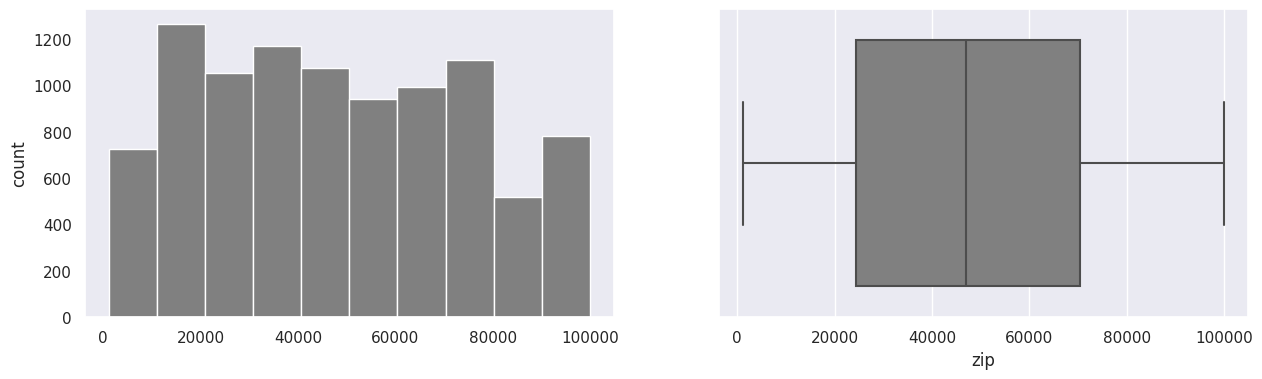

city_pop
Skew: 5.74
Threshold for Outliers for city_pop : (-26593.5, 46442.5)
Number of Outliers for city_pop: 1840


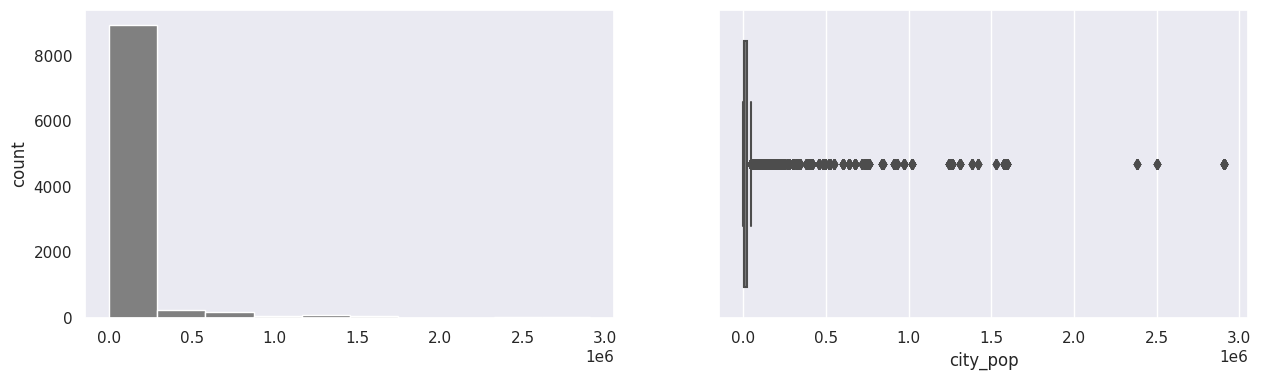

is_fraud
Skew: 0
Threshold for Outliers for is_fraud : (1.0, 1.0)
Number of Outliers for is_fraud: 0


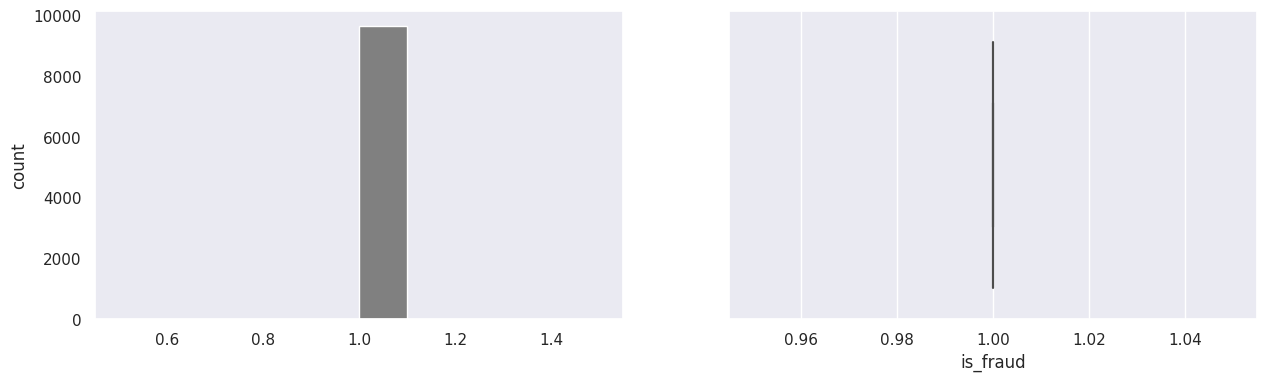

hour
Skew: -0.42
Threshold for Outliers for hour : (-29.5, 54.5)
Number of Outliers for hour: 0


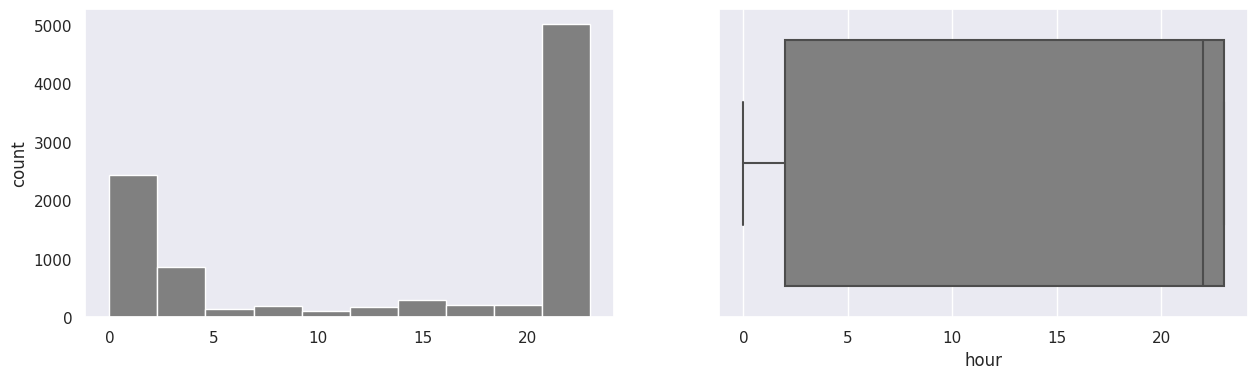

month
Skew: 0.06
Threshold for Outliers for month : (-6.0, 18.0)
Number of Outliers for month: 0


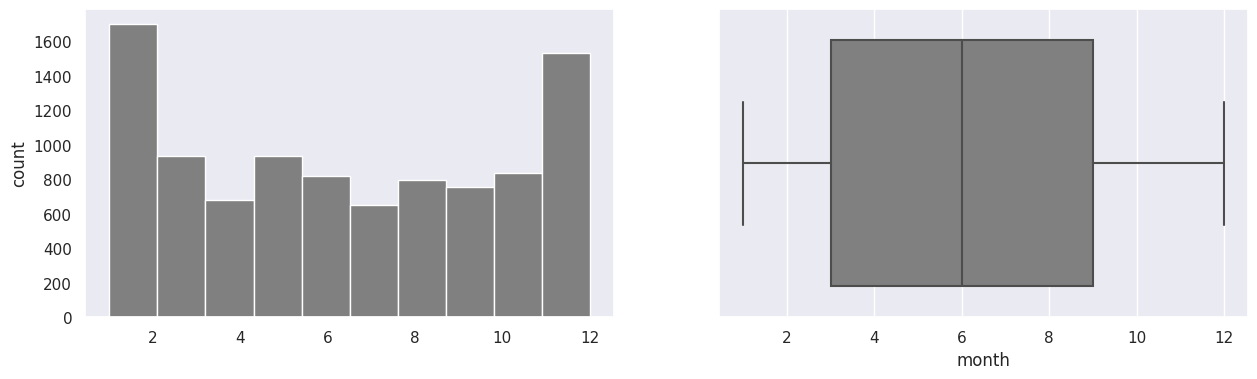

age
Skew: 0.38
Threshold for Outliers for age : (-9.0, 103.0)
Number of Outliers for age: 0


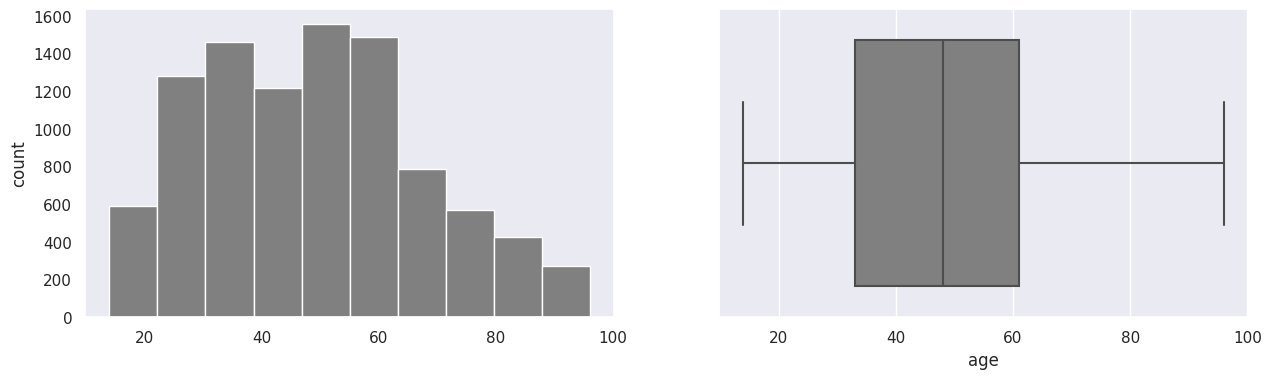

distance_km
Skew: -0.22
Threshold for Outliers for distance_km : (-8.692499999999995, 162.6875)
Number of Outliers for distance_km: 0


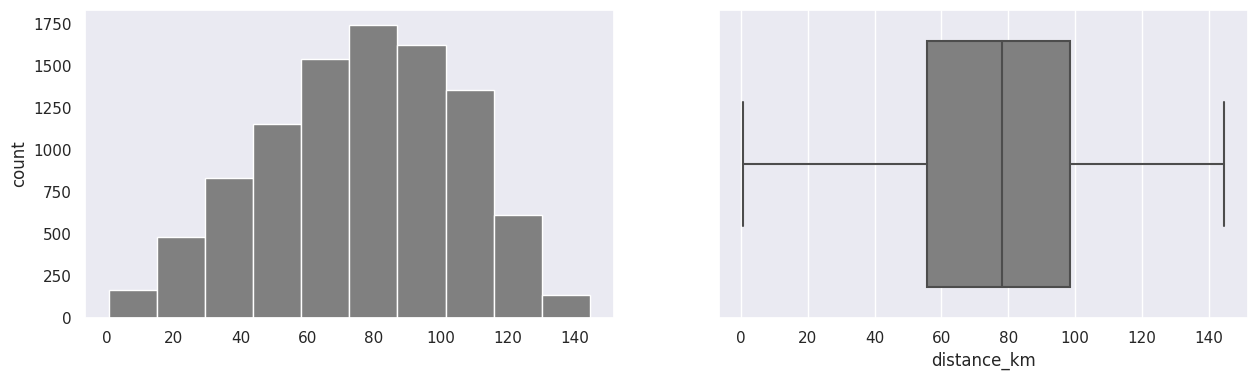

In [45]:
for col in num_cols:
    print(col)

    # Filter data for 'is_fraud' == 1
    fraud_data = df[df['is_fraud'] == 1][col]

    print('Skew:', round(fraud_data.skew(), 2))

    plt.figure(figsize=(15, 4))

    # Histogram with grey color
    plt.subplot(1, 2, 1)
    fraud_data.hist(grid=False, color='grey')  # Set color to grey
    plt.ylabel('count')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=fraud_data, color ='grey')

    # Outliers detection and printing
    q1 = fraud_data.quantile(0.25)
    q3 = fraud_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = fraud_data[(fraud_data < lower_bound) | (fraud_data > upper_bound)]

    print(f"Threshold for Outliers for {col} : ({lower_bound}, {upper_bound})")
    print(f"Number of Outliers for {col}: {len(outliers)}")

    plt.show()


In [16]:
for month in range(1, 13):
    fraud_data_month = df[(df['is_fraud'] == 1) & (df['month'] == month)]
    print(f"Fraud Data for Month {month}:\n{fraud_data_month}\n")


Fraud Data for Month 1:
       trans_date_trans_time            cc_num                      merchant  \
2449     2019-01-02 01:06:37     4613314721966              Rutherford-Mertz   
2472     2019-01-02 01:47:29   340187018810220    Jenkins, Hauck and Friesen   
2523     2019-01-02 03:05:23   340187018810220              Goodwin-Nitzsche   
2546     2019-01-02 03:38:03     4613314721966              Erdman-Kertzmann   
2553     2019-01-02 03:55:47   340187018810220                  Koepp-Parker   
...                      ...               ...                           ...   
976964   2020-01-31 22:52:46   343668971234893              Volkman-Predovic   
976966   2020-01-31 22:53:32     4605902936394                   Goyette Inc   
976983   2020-01-31 23:04:50     4988304376504    Swaniawski, Lowe and Robel   
977025   2020-01-31 23:42:16     4605902936394                   Abshire PLC   
977049   2020-01-31 23:57:30  6500249000784905  Daugherty, Pouros and Beahan   

             ca

In [19]:
df[(df['month'] == 1)]

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,is_fraud,split,hour,day,month,age,distance_km
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,3495,"Psychologist, counselling",0,train,0,1,1,31,78.60
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,149,Special educational needs teacher,0,train,0,1,1,41,30.21
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,M,Malad City,83252,4154,Nature conservation officer,0,train,0,1,1,57,108.21
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,1939,Patent attorney,0,train,0,1,1,52,95.67
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,99,Dance movement psychotherapist,0,train,0,1,1,33,77.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977047,2020-01-31 23:57:01,4003989662068504,Pouros-Conroy,shopping_pos,2.55,M,Bessemer,35022,71463,Radio broadcast assistant,0,train,23,4,1,31,51.75
977048,2020-01-31 23:57:03,5559857416065248,Abernathy and Sons,food_dining,15.35,M,Grenada,96038,589,Systems analyst,0,train,23,4,1,75,77.87
977049,2020-01-31 23:57:30,6500249000784905,"Daugherty, Pouros and Beahan",shopping_pos,923.77,M,Wilmington,28412,186140,"Accountant, chartered certified",1,train,23,4,1,54,120.62
977050,2020-01-31 23:59:15,3577596616955856,Kutch-Ferry,home,40.67,M,Summerfield,27358,14075,"Buyer, industrial",0,train,23,4,1,91,34.53


In [22]:
df[(df['is_fraud'] == 1) & (df['m'] == 1)]

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,is_fraud,split,hour,day,month,age,distance_km
2449,2019-01-02 01:06:37,4613314721966,Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,28611,885,Soil scientist,1,train,1,2,1,31,68.95
2472,2019-01-02 01:47:29,340187018810220,"Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,78208,1595797,Horticultural consultant,1,train,1,2,1,59,78.41
2523,2019-01-02 03:05:23,340187018810220,Goodwin-Nitzsche,grocery_pos,276.31,F,San Antonio,78208,1595797,Horticultural consultant,1,train,3,2,1,59,41.01
2546,2019-01-02 03:38:03,4613314721966,Erdman-Kertzmann,gas_transport,7.03,M,Collettsville,28611,885,Soil scientist,1,train,3,2,1,31,34.15
2553,2019-01-02 03:55:47,340187018810220,Koepp-Parker,grocery_pos,275.73,F,San Antonio,78208,1595797,Horticultural consultant,1,train,3,2,1,59,44.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976964,2020-01-31 22:52:46,343668971234893,Volkman-Predovic,shopping_net,926.69,F,Hopkins,29061,13717,Chiropodist,1,train,22,4,1,71,91.02
976966,2020-01-31 22:53:32,4605902936394,Goyette Inc,shopping_net,1031.92,M,Dallas,75238,1263321,Drilling engineer,1,train,22,4,1,61,86.89
976983,2020-01-31 23:04:50,4988304376504,"Swaniawski, Lowe and Robel",shopping_pos,856.92,M,Rock Tavern,12575,2258,Building surveyor,1,train,23,4,1,83,109.90
977025,2020-01-31 23:42:16,4605902936394,Abshire PLC,entertainment,456.06,M,Dallas,75238,1263321,Drilling engineer,1,train,23,4,1,61,91.50


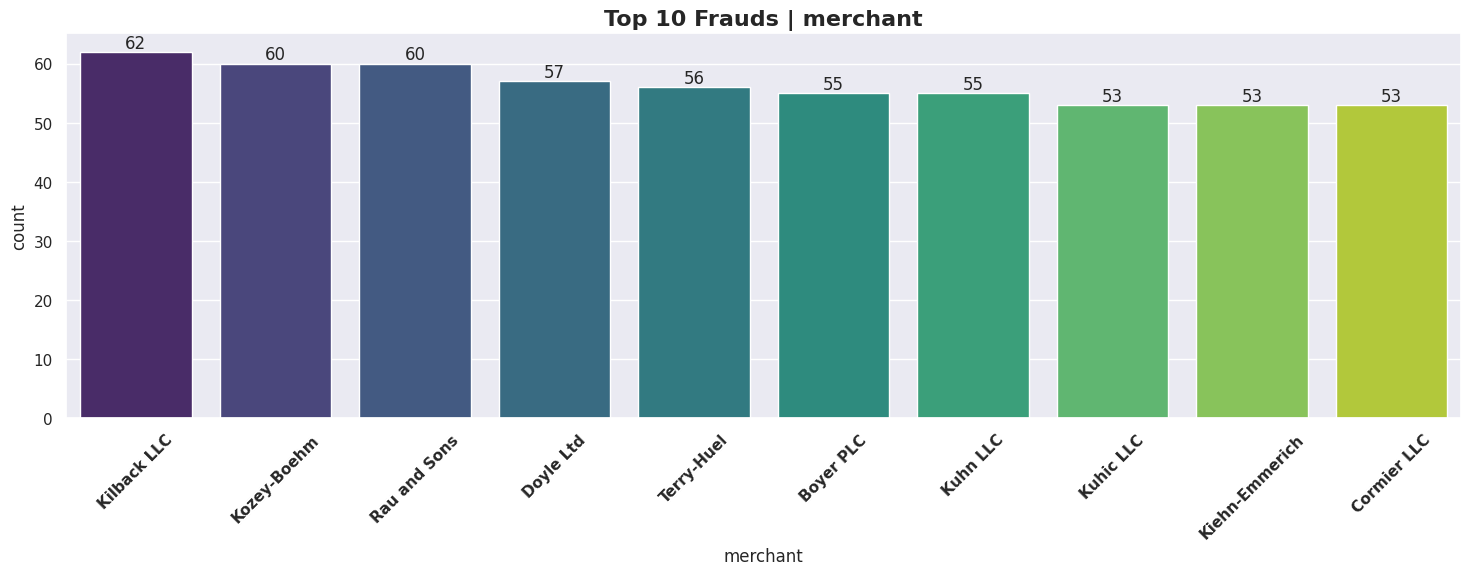

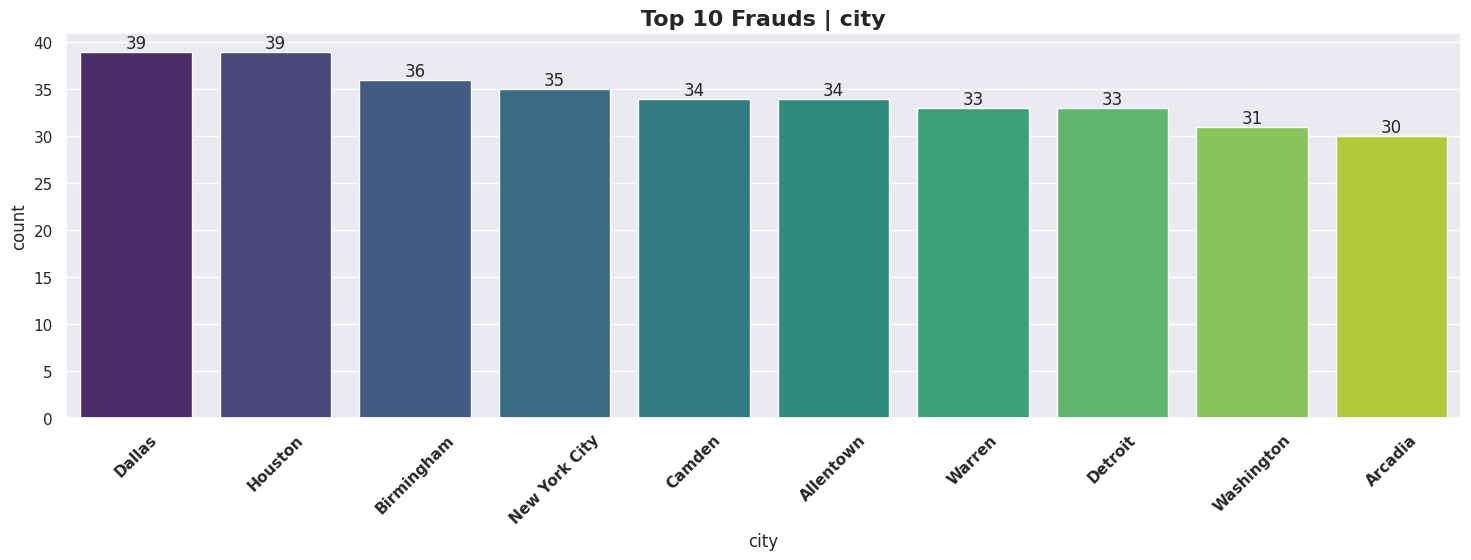

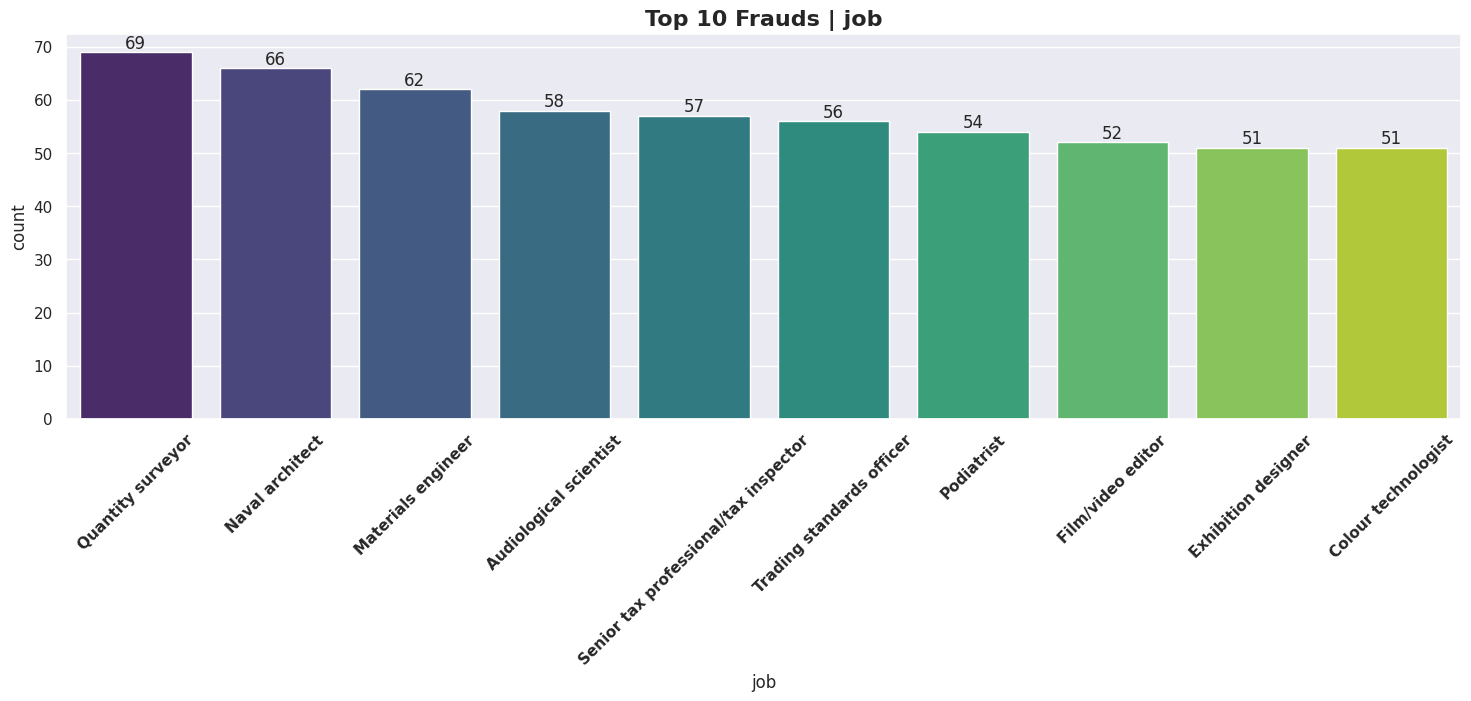

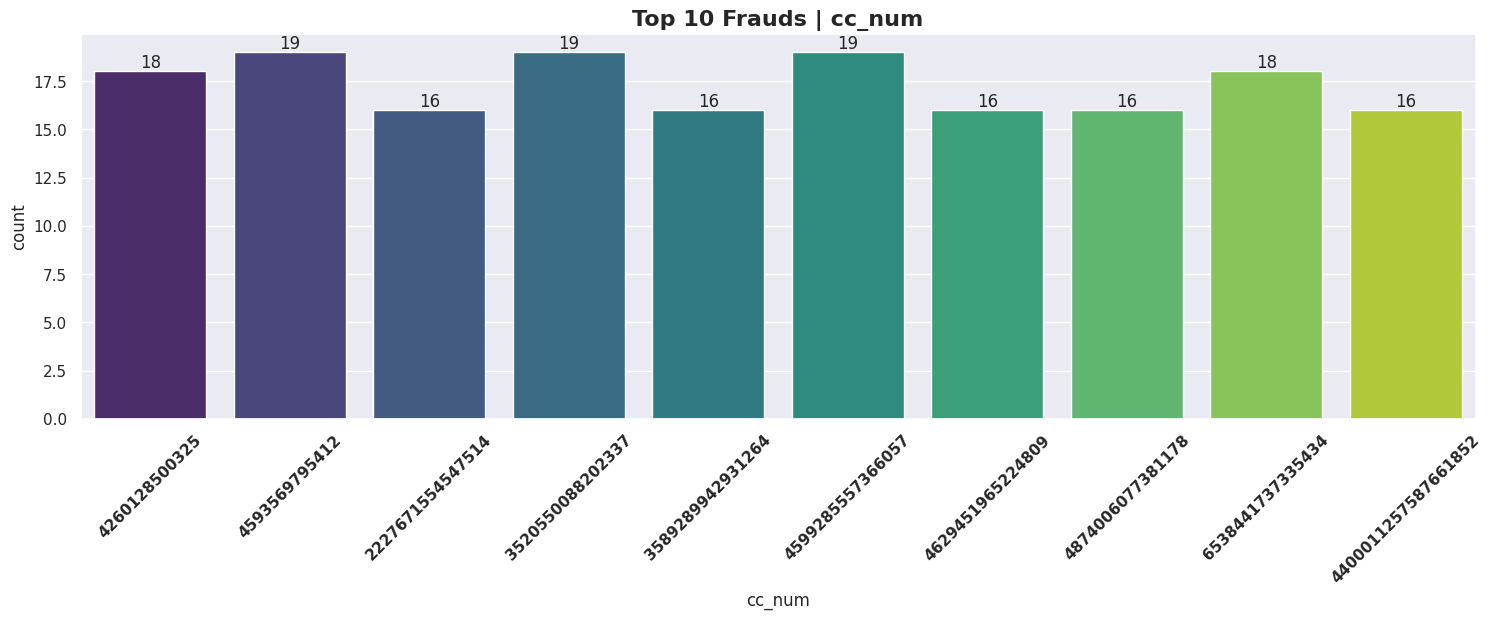

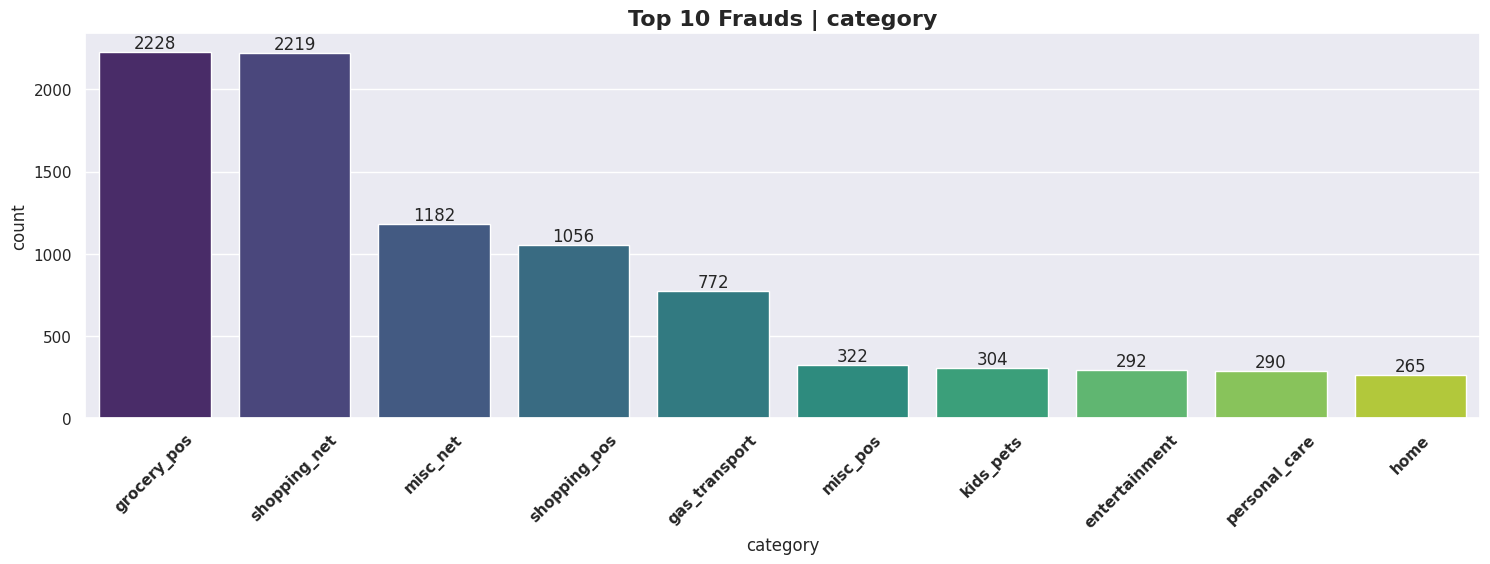

In [34]:
def bar_plot(col):
    def top_frauds(col):
        return df.loc[df['is_fraud'] == 1, [col]].value_counts().reset_index(name='count').head(10)

    ax = sns.barplot(data=top_frauds(col), x=col, y='count', palette='viridis')
    ax.bar_label(ax.containers[0])
    plt.title(f'Top 10 Frauds | {col}', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, fontweight='bold')

# Figure 1
plt.figure(figsize=(18, 5))
bar_plot('merchant')

# Figure 2
plt.figure(figsize=(18, 5))
bar_plot('city')

# Figure 3
plt.figure(figsize=(18, 5))
bar_plot('job')

# Figure 4
plt.figure(figsize=(18, 5))
bar_plot('cc_num')

# Figure 5
plt.figure(figsize=(18, 5))
bar_plot('category')

plt.show()


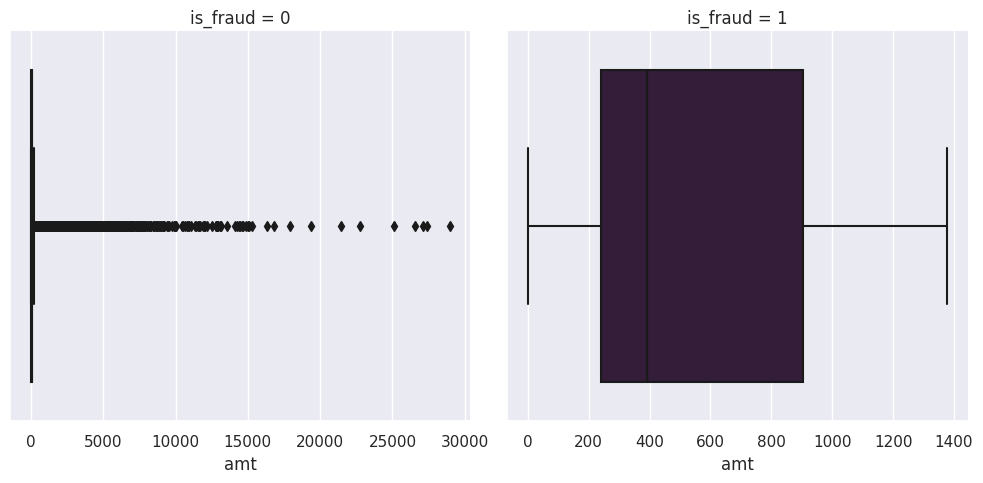

In [ ]:
#Amount
sns.catplot(data=df,x='amt',col='is_fraud',kind='box',sharex=False)

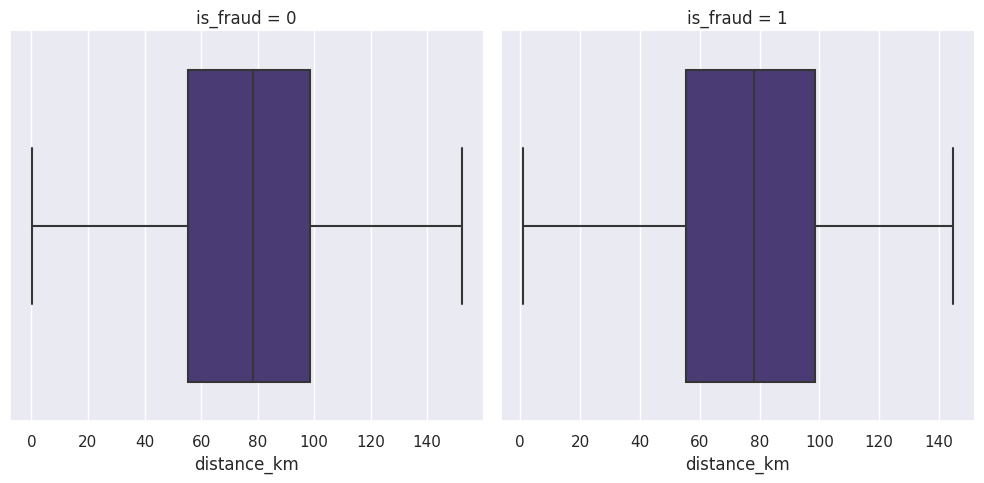

In [ ]:
#Distance
sns.catplot(data=df,x='distance_km',col='is_fraud',kind='box',sharex=False)

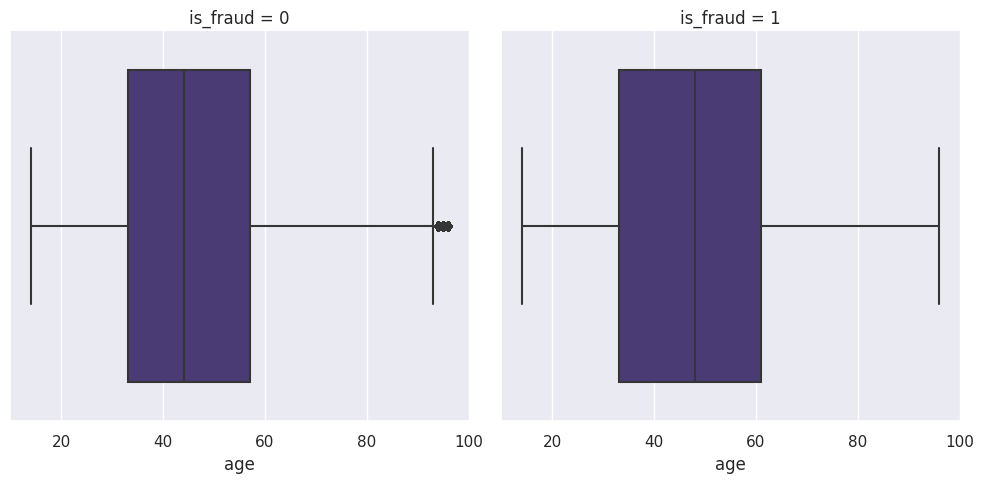

In [ ]:
#Age
sns.catplot(data=df,x='age',col='is_fraud',kind='box',sharex=False)

#We detect a huge number of outliers in the amounts of genuine transaction
#We will handle that in the scaling process since we can't remove them
#Because they represent real data


In [22]:
def pie_bar_plot(col):
    print(df[col].value_counts())
    sns.set_palette('viridis')

    # Calculate the explode list based on the number of unique values
    explode = [0.05] * len(df[col].unique())

    fig, axs = plt.subplots(1, 2)

    axs[0].pie(df[col].value_counts().values.tolist(), autopct='%.2f%%', textprops={'fontsize': 12}, explode=explode, shadow=True)
    sns.countplot(data=df, x=col, ax=axs[1])

    fig.legend(labels=df[col].value_counts().index.tolist(), loc='upper left', fontsize=10)
    fig.tight_layout()
    plt.show()

In [38]:
def pie_bar_plot_fraud(col):
    # Filter DataFrame based on the condition is_fraud == 1
    fraud_df = df[df['is_fraud'] == 1]

    # Print value counts for verification
    print(fraud_df[col].value_counts())

    sns.set_palette('viridis')
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Calculate explode values based on the number of unique days
    explode = [0.05] * len(fraud_df[col].unique())

    # Pie chart for value counts
    axs[0].pie(fraud_df[col].value_counts().values, autopct='%.2f%%', textprops={'fontsize': 14}, explode=explode, shadow=True)
    axs[0].set_title(f'Pie Chart: {col} for Fraudulent Transactions', fontsize=16, fontweight='bold')

    # Count plot
    sns.countplot(data=fraud_df, x=col, ax=axs[1], palette='viridis')
    axs[1].set_title(f'Count Plot: {col} for Fraudulent Transactions', fontsize=16, fontweight='bold')

    # Set legend
    fig.legend(labels=fraud_df[col].value_counts().index, loc='upper left', fontsize=12)

    # Adjust layout
    fig.tight_layout()
    plt.show()

In [24]:
def pie_bar_plot_no_fraud(col):
    # Filter DataFrame based on the condition is_fraud == 1
    fraud_df = df[df['is_fraud'] == 1]

    # Print value counts for verification
    print(fraud_df[col].value_counts())

    sns.set_palette('viridis')
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Pie chart for value counts
    axs[0].pie(fraud_df[col].value_counts().values, autopct='%.2f%%', textprops={'fontsize': 14}, explode=[0, 0.05], shadow=True)
    axs[0].set_title(f'Pie Chart: {col} for Fraudulent Transactions', fontsize=16, fontweight='bold')

    # Count plot
    sns.countplot(data=fraud_df, x=col, ax=axs[1], palette='viridis')
    axs[1].set_title(f'Count Plot: {col} for Fraudulent Transactions', fontsize=16, fontweight='bold')

    # Set legend
    fig.legend(labels=fraud_df[col].value_counts().index, loc='upper left', fontsize=12)

    # Adjust layout
    fig.tight_layout()
    plt.show()

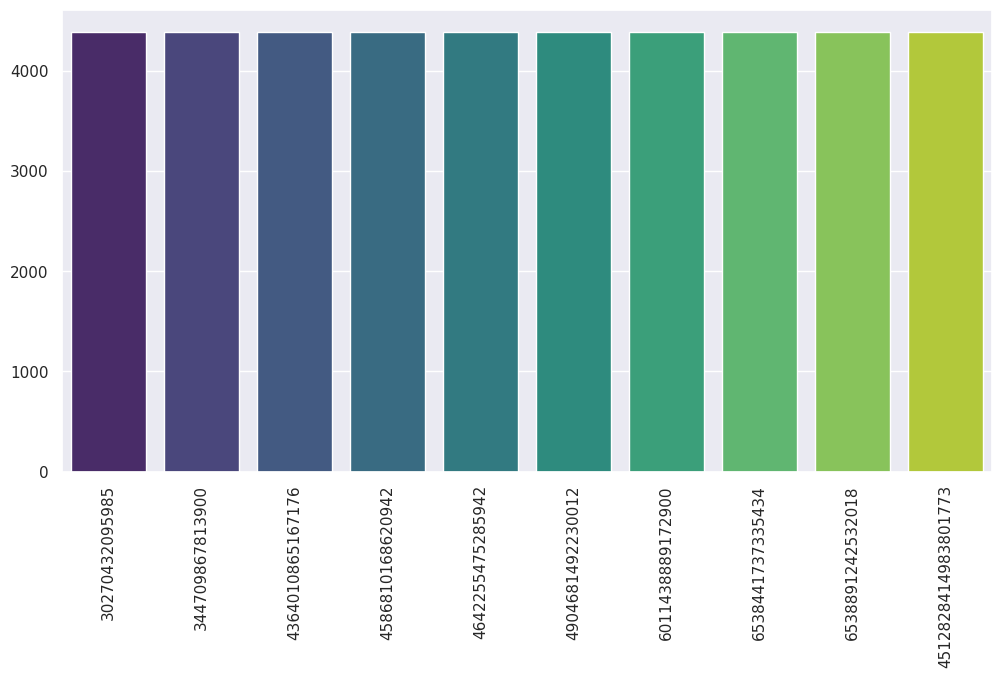

In [25]:
top_categories = df['cc_num'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.xticks(rotation=90)
plt.show()


0    1842743
1       9651
Name: is_fraud, dtype: int64


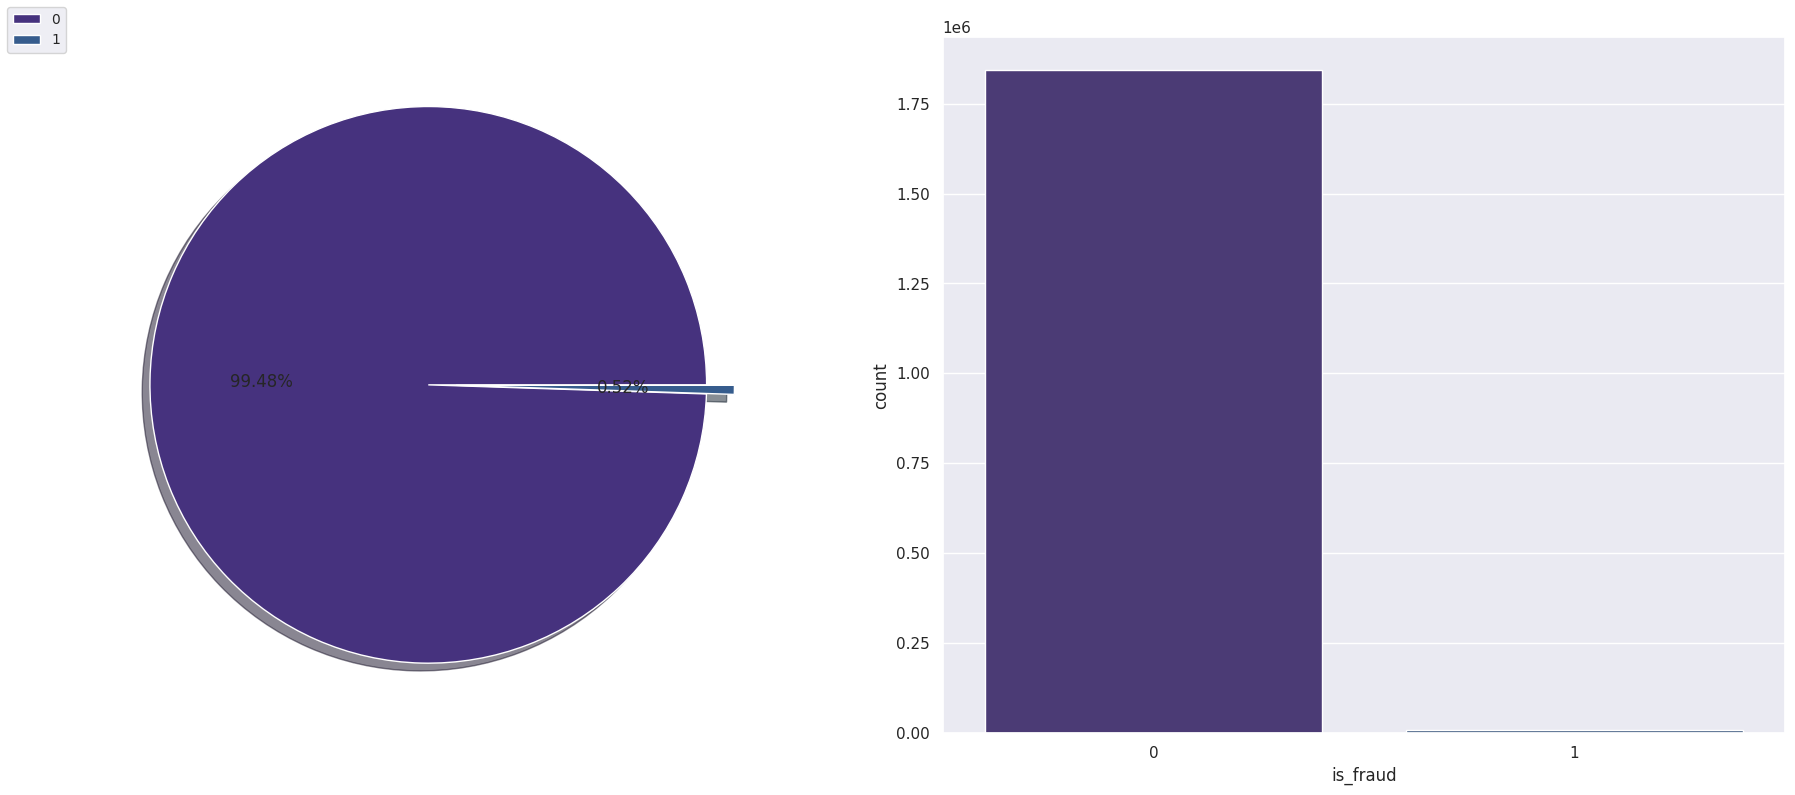

In [36]:
#Gender
pie_bar_plot('is_fraud')

Sunday       1590
Saturday     1493
Monday       1484
Friday       1376
Thursday     1317
Tuesday      1266
Wednesday    1125
Name: day, dtype: int64


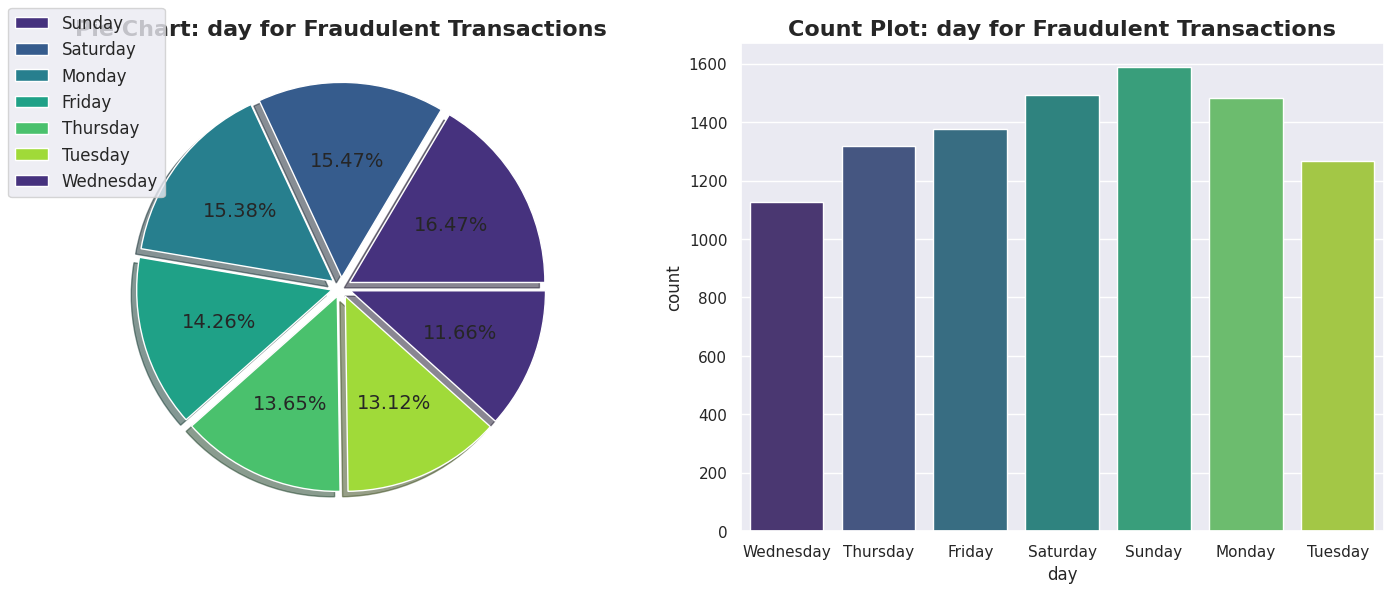

In [39]:
pie_bar_plot_fraud('day')

Sunday       1590
Saturday     1493
Monday       1484
Friday       1376
Thursday     1317
Tuesday      1266
Wednesday    1125
Name: day, dtype: int64


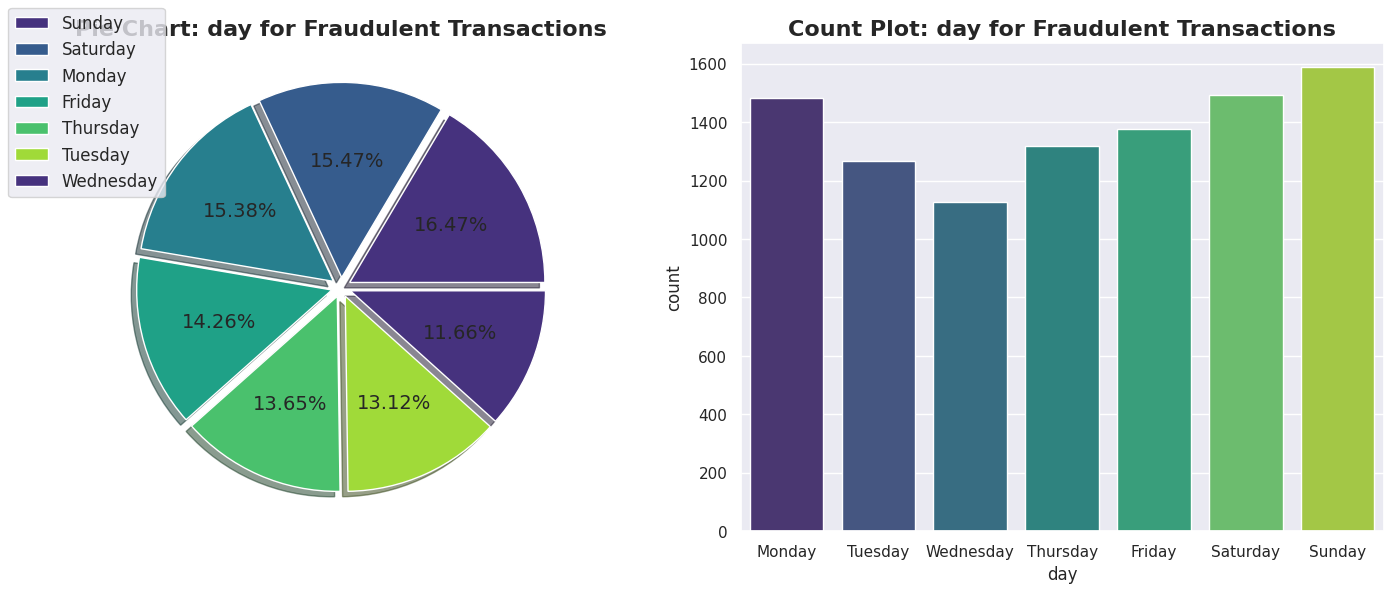

Monday       369418
Sunday       343677
Tuesday      270340
Saturday     263227
Friday       215078
Thursday     206741
Wednesday    183913
Name: day, dtype: int64


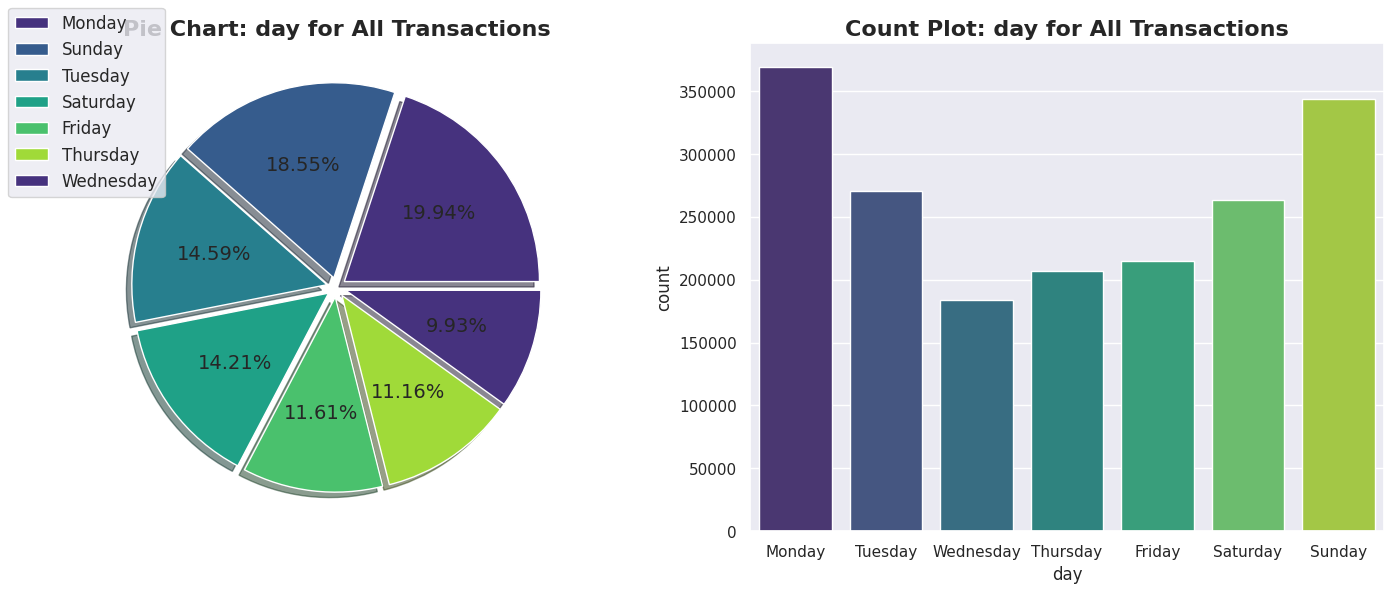

In [41]:
def pie_bar_plot_generic(col, filter_fraud=False):
    # Filter DataFrame based on the condition
    if filter_fraud:
        data_df = df[df['is_fraud'] == 1]
    else:
        data_df = df

    # Print value counts for verification
    print(data_df[col].value_counts())

    sns.set_palette('viridis')
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Calculate explode values based on the number of unique values
    explode = [0.05] * len(data_df[col].unique())

    # Pie chart for value counts
    axs[0].pie(data_df[col].value_counts().values, autopct='%.2f%%', textprops={'fontsize': 14}, explode=explode, shadow=True)
    axs[0].set_title(f'Pie Chart: {col} for {"Fraudulent" if filter_fraud else "All"} Transactions', fontsize=16, fontweight='bold')

    # Count plot with specified order of days
    sns.countplot(data=data_df, x=col, ax=axs[1], palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    axs[1].set_title(f'Count Plot: {col} for {"Fraudulent" if filter_fraud else "All"} Transactions', fontsize=16, fontweight='bold')

    # Set legend
    fig.legend(labels=data_df[col].value_counts().index, loc='upper left', fontsize=12)

    # Adjust layout
    fig.tight_layout()
    plt.show()

# Call the functions with different conditions
pie_bar_plot_generic('day', filter_fraud=True)  # For fraud transactions
pie_bar_plot_generic('day', filter_fraud=False)  # For all transactions


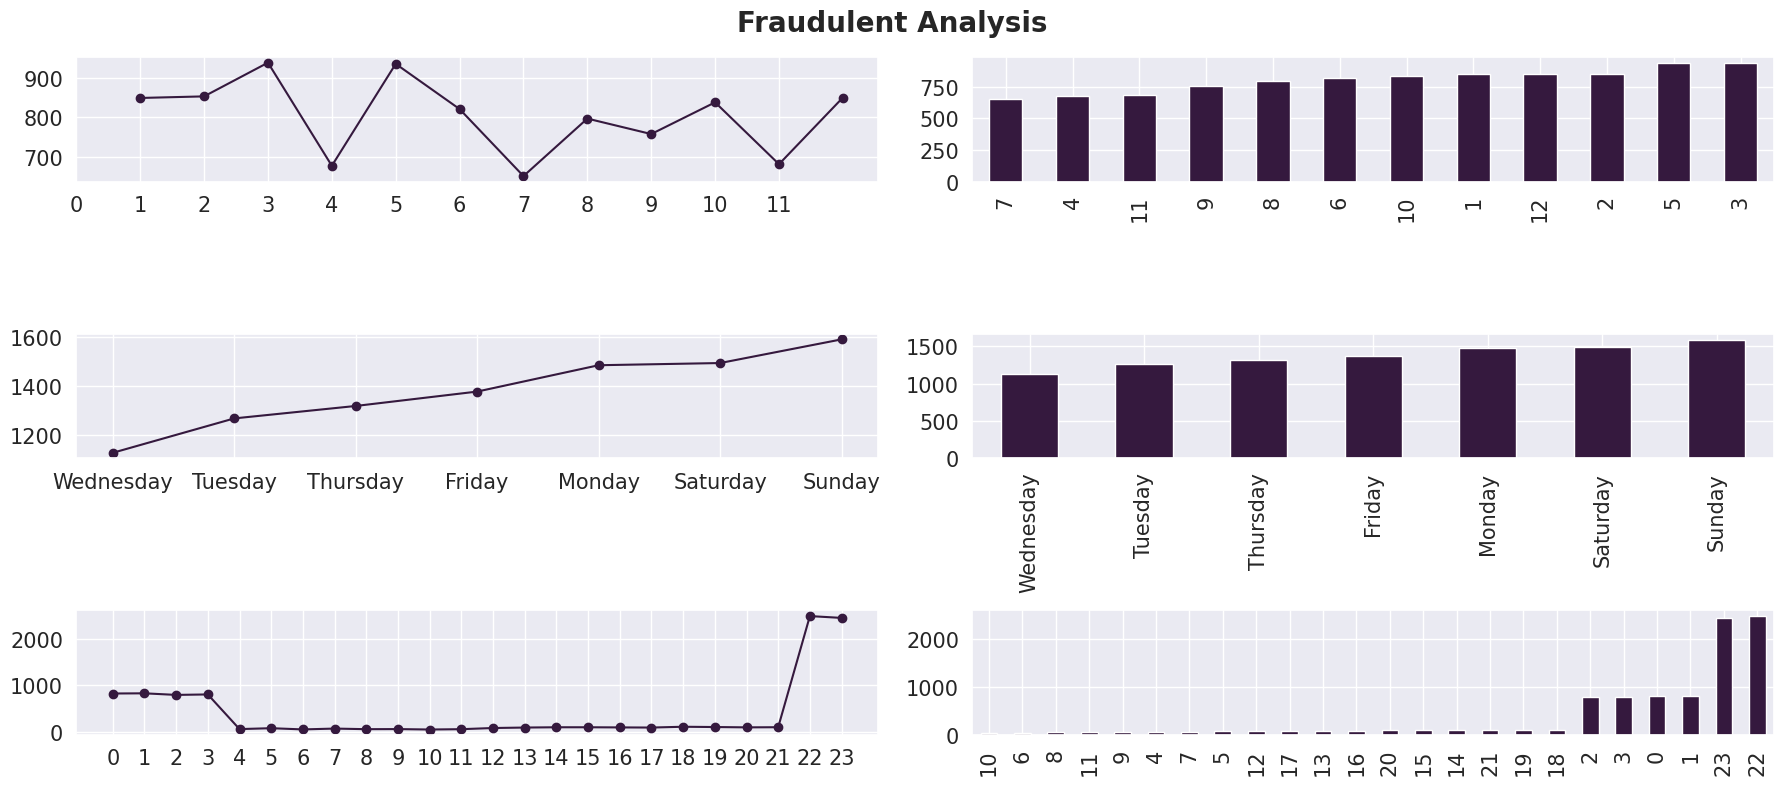

In [18]:
#What is the most month|day|hour frauds occur?
fig,axs = plt.subplots(3,2)
#Month
df.loc[df['is_fraud']==1,'month'].value_counts().sort_index().plot(kind='line',ax=axs[0,0],marker='o',fontsize=15)
axs[0,0].set_xticks(range(0,12))
df.loc[df['is_fraud']==1,'month'].value_counts(ascending=True).plot(kind='bar',ax=axs[0,1],fontsize=15)
fig.suptitle('Fraudulent Analysis', fontsize=18, fontweight='bold')
##Day
df.loc[df['is_fraud']==1,'day'].value_counts(ascending=True).plot(kind='line',ax=axs[1,0],marker='o',fontsize=15)
df.loc[df['is_fraud']==1,'day'].value_counts(ascending=True).plot(kind='bar',ax=axs[1,1],fontsize=15)
#Hour
df.loc[df['is_fraud']==1,'hour'].value_counts().sort_index().plot(kind='line',ax=axs[2,0],marker='o',fontsize=15)
axs[2,0].set_xticks(range(0,24))
df.loc[df['is_fraud']==1,'hour'].value_counts(ascending=True).plot(kind='bar',ax=axs[2,1],fontsize=15)
fig.suptitle('Fraudulent Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()

In [44]:
import numpy as np

def calculate_p_value(feature, target):
    if np.issubdtype(df[feature].dtype, np.number):
        # Numeric feature, use t-test
        group1 = df[df[target] == 1][feature]
        group2 = df[df[target] == 0][feature]
        t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
    elif df[feature].dtype == 'object':
        # Categorical feature, use chi-square test
        contingency_table = pd.crosstab(df[target], df[feature])
        _, p_value, _, _ = chi2_contingency(contingency_table)
    else:
        # Unsupported data type, set p_value to NaN
        p_value = float('nan')

    return p_value


In [45]:
from scipy.stats import ttest_ind, chi2_contingency
import pandas as pd


# Replace 'target_column' with the column representing the output variable
target_column = 'is_fraud'

# Create a DataFrame to store p-values
p_values_df = pd.DataFrame(columns=['Feature', 'P-Value', 'Significance'])

# Iterate over features in the dataset
for feature in df.columns:
    if feature != target_column:  # Skip the target variable
        p_value = calculate_p_value(feature, target_column)

        # Define significance levels
        if pd.notna(p_value):
            if p_value > 0.10:
                significance = 'not significant'
            elif p_value <= 0.10:
                significance = 'marginally significant'
            elif p_value <= 0.05:
                significance = 'significant'
            elif p_value <= 0.01:
                significance = 'highly significant'
        else:
            significance = 'Unsupported data type'

        # Append results to the DataFrame
        p_values_df = p_values_df.append({'Feature': feature, 'P-Value': p_value, 'Significance': significance}, ignore_index=True)

# Display the p-values DataFrame
print(p_values_df)


                  Feature        P-Value            Significance
0   trans_date_trans_time            NaN   Unsupported data type
1                  cc_num   1.165579e-01         not significant
2                merchant   0.000000e+00  marginally significant
3                category   0.000000e+00  marginally significant
4                     amt   0.000000e+00  marginally significant
5                  gender   1.973697e-15  marginally significant
6                    city   0.000000e+00  marginally significant
7                     zip   3.156286e-03  marginally significant
8                city_pop   6.630615e-01         not significant
9                     job   0.000000e+00  marginally significant
10                  split   1.336497e-62  marginally significant
11                   hour   2.623384e-36  marginally significant
12                    day   7.809807e-60  marginally significant
13                  month  2.815842e-104  marginally significant
14                    age

In [ ]:
!pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 1.4 MB/s eta 0:00:00


In [ ]:
from docx import Document
from docx.shared import Pt
from docx.shared import Inches

# Your data
data = [
    ["trans_date_trans_time", "NaN", "Unsupported data type"],
    ["cc_num", 1.165579e-01, "not significant"],
    ["merchant", 0.000000e+00, "marginally significant"],
    ["category", 0.000000e+00, "marginally significant"],
    ["amt", 0.000000e+00, "marginally significant"],
    ["gender", 1.973697e-15, "marginally significant"],
    ["city", 0.000000e+00, "marginally significant"],
    ["zip", 3.156286e-03, "marginally significant"],
    ["city_pop", 6.630615e-01, "not significant"],
    ["job", 0.000000e+00, "marginally significant"],
    ["split", 1.336497e-62, "marginally significant"],
    ["hour", 2.623384e-36, "marginally significant"],
    ["day", 4.034580e-11, "marginally significant"],
    ["month", 2.815842e-104, "marginally significant"],
    ["age", 1.209845e-43, "marginally significant"],
    ["distance_km", 6.219830e-01, "not significant"]
]

# Create a new Word document
doc = Document()

# Add a table
table = doc.add_table(rows=1, cols=3)
table.autofit = True

# Header row
table.rows[0].cells[0].text = "Feature"
table.rows[0].cells[1].text = "P-Value"
table.rows[0].cells[2].text = "Significance"

# Add data to the table
for row_data in data:
    row_cells = table.add_row().cells
    for idx, value in enumerate(row_data):
        cell = row_cells[idx]
        if isinstance(value, float):
            value = "{:.2e}".format(value)
        cell.text = str(value)

# Style the table
for row in table.rows:
    for cell in row.cells:
        cell.paragraphs[0].runs[0].font.size = Pt(10)
        cell.vertical_alignment = WD_ALIGN_VERTICAL.CENTER
        cell.paragraphs[0].alignment = 1  # 1 corresponds to center alignment


# Save the document
doc.save("/content/output.docx")


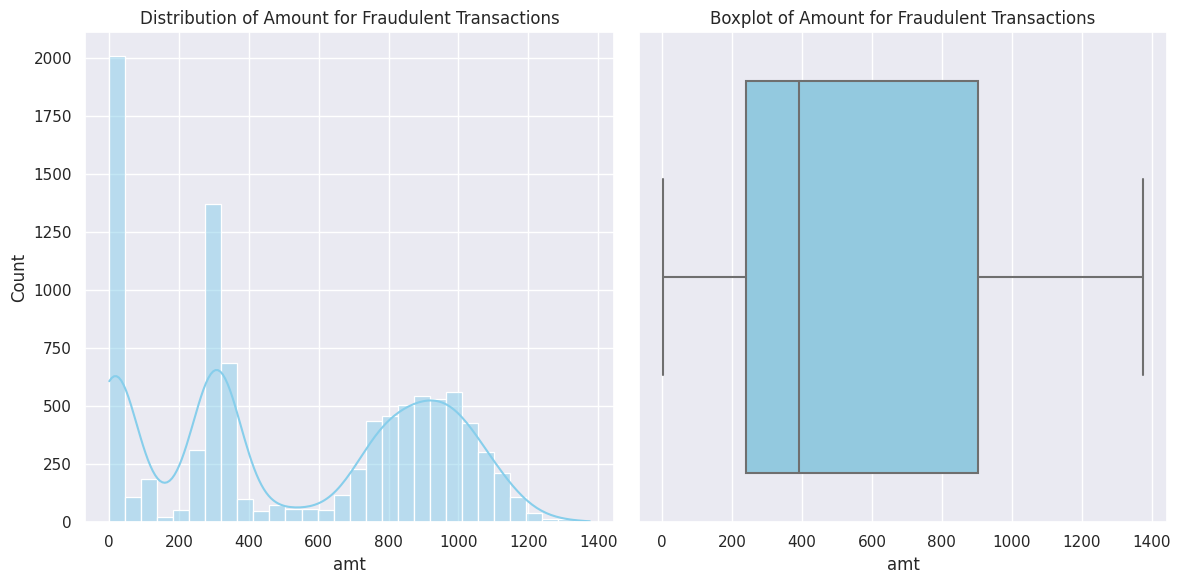

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only rows where is_fraud is 1
fraudulent_data = df[df['is_fraud'] == 1]

# Plot the distribution of 'amt' for fraud transactions
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(fraudulent_data['amt'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Amount for Fraudulent Transactions')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='amt', data=fraudulent_data, color='skyblue')
plt.title('Boxplot of Amount for Fraudulent Transactions')

plt.tight_layout()
plt.show()


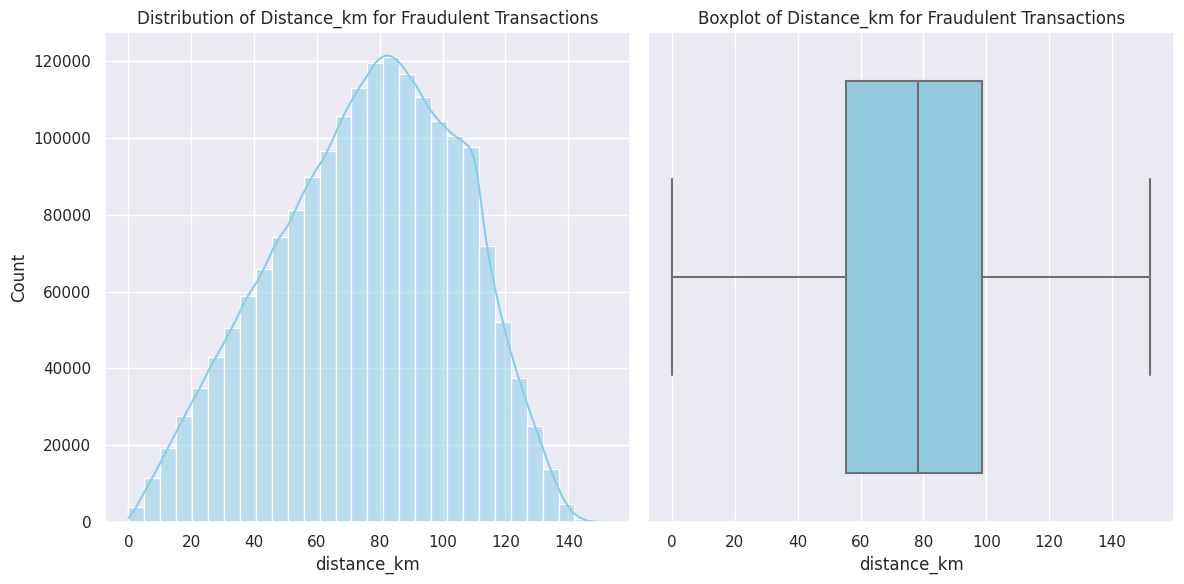

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only rows where is_fraud is 1
fraudulent_data = df[df['is_fraud'] == 1]

# Plot the distribution of 'distance_km' for fraud transactions
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(fraudulent_data['distance_km'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Distance_km for Fraudulent Transactions')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='distance_km', data=fraudulent_data, color='skyblue')
plt.title('Boxplot of Distance_km for Fraudulent Transactions')

plt.tight_layout()
plt.show()


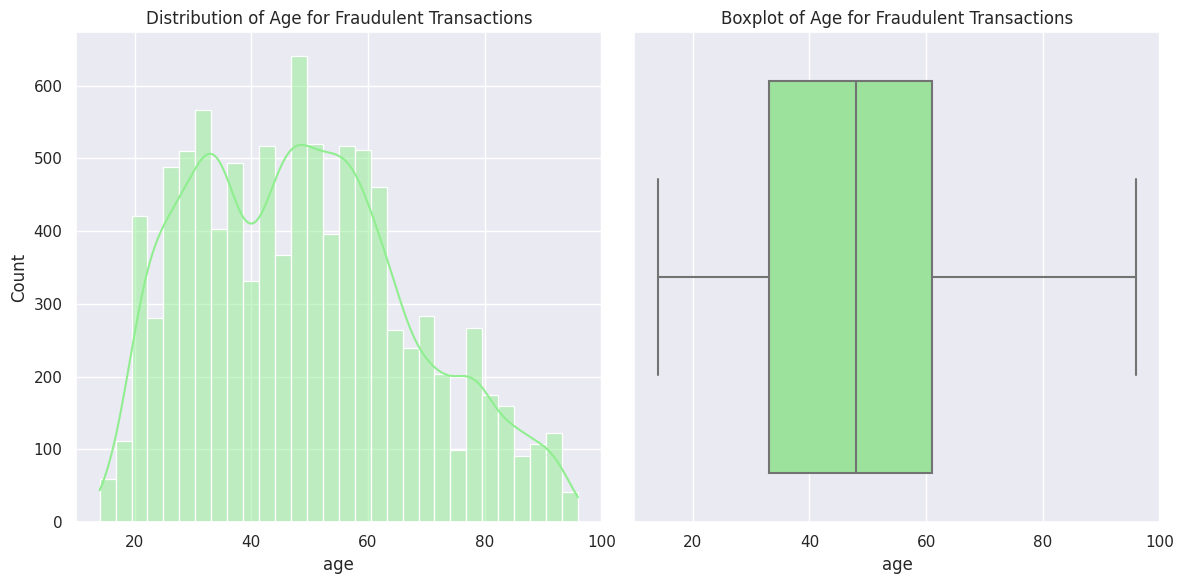

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only rows where is_fraud is 1
fraudulent_data = df[df['is_fraud'] == 1]

# Plot the distribution of 'age' for fraud transactions
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(fraudulent_data['age'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Age for Fraudulent Transactions')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='age', data=fraudulent_data, color='lightgreen')
plt.title('Boxplot of Age for Fraudulent Transactions')

plt.tight_layout()
plt.show()


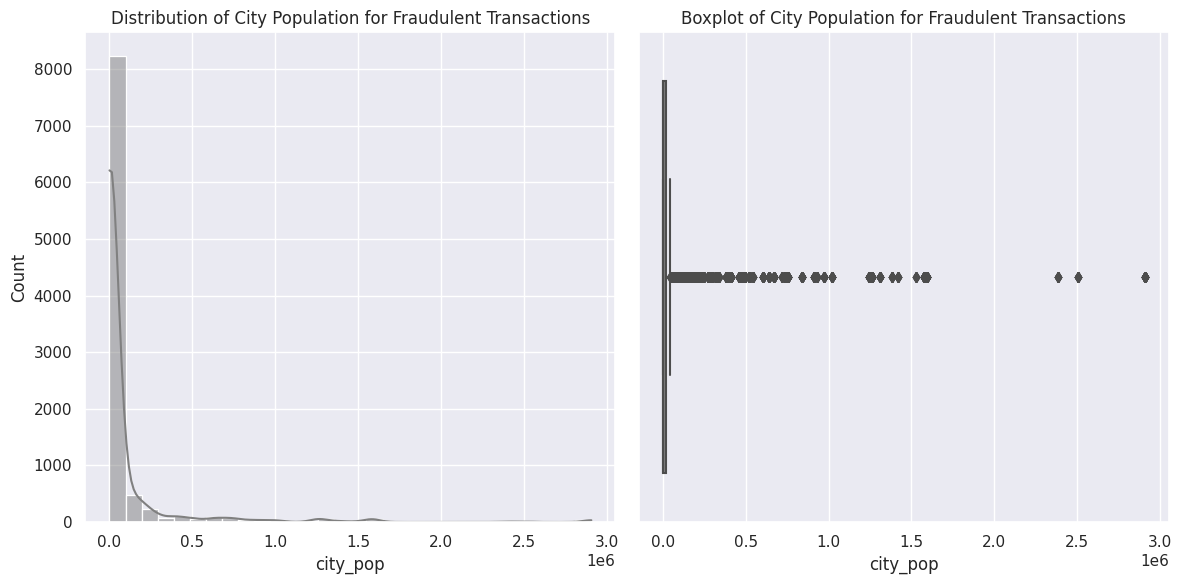

In [ ]:
# Filter the DataFrame to include only rows where is_fraud is 1
fraudulent_data = df[df['is_fraud'] == 1]

# Plot the distribution of 'city_pop' for fraud transactions
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(fraudulent_data['city_pop'], bins=30, kde=True, color='gray')
plt.title('Distribution of City Population for Fraudulent Transactions')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='city_pop', data=fraudulent_data, color='gray')
plt.title('Boxplot of City Population for Fraudulent Transactions')

plt.tight_layout()
plt.show()


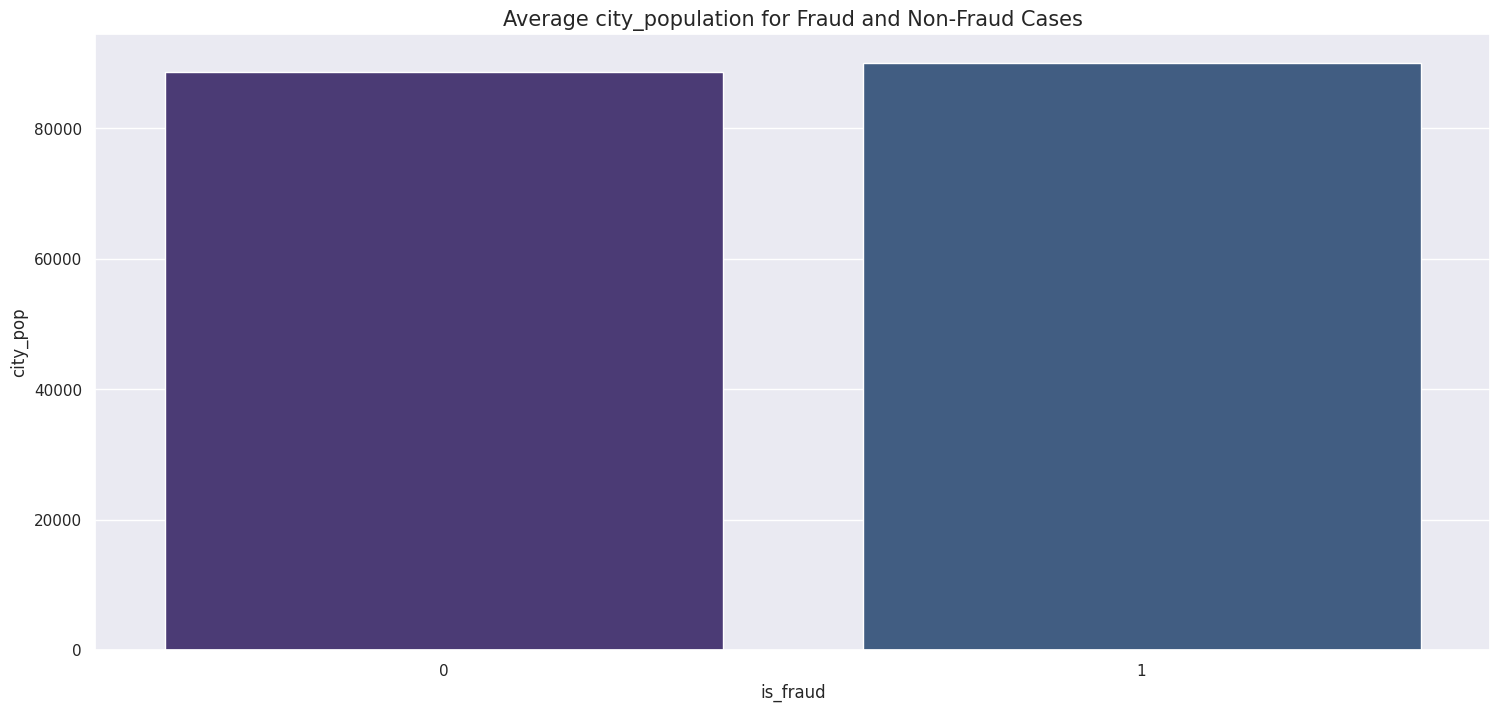

T-test: t-statistic = 0.443, p-value = 0.658, p-value<0.05? False


In [ ]:
sns.barplot(data=df,x='is_fraud', y='city_pop', ci=None)
plt.title('Average city_population for Fraud and Non-Fraud Cases',fontsize=15)
plt.show()

fraud_population = df[df['is_fraud'] == 1]['city_pop']
non_fraud_population = df[df['is_fraud'] == 0]['city_pop']
t_stat, p_value = ttest_ind(fraud_population, non_fraud_population)
print(f'T-test: t-statistic = {round(t_stat,3)}, p-value = {round(p_value,3)}, p-value<0.05? {p_value<0.05}')

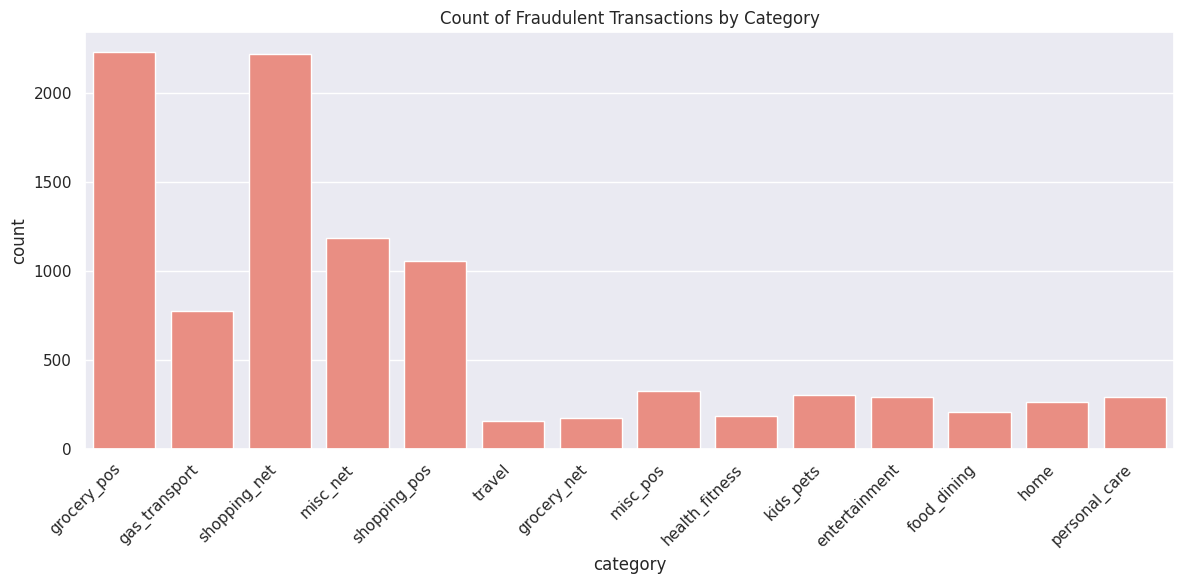

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only rows where is_fraud is 1
fraudulent_data = df[df['is_fraud'] == 1]

# Plot the count of occurrences for each 'category' in fraudulent transactions
plt.figure(figsize=(12, 6))

# Countplot
plt.subplot(1, 1, 1)
sns.countplot(x='category', data=fraudulent_data, color='salmon')
plt.title('Count of Fraudulent Transactions by Category')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


In [ ]:
def scatter_plots_for_fraud_detection(df, feature_list):
    # Select fraud and non-fraud transactions
    fraudulent_data = df[df['is_fraud'] == 1]
    non_fraudulent_data = df[df['is_fraud'] == 0]

    # Generate scatter plots for each pair of features
    for i in range(len(feature_list) - 1):
        for j in range(i + 1, len(feature_list)):
            feature_x = feature_list[i]
            feature_y = feature_list[j]

            # Scatter plot
            plt.figure(figsize=(12, 8))
            sns.scatterplot(x=feature_x, y=feature_y, hue='is_fraud', data=df, alpha=0.5)
            plt.title(f'Scatter Plot of {feature_x} vs. {feature_y} for Fraud/Non-Fraud Transactions')
            plt.xlabel(feature_x)
            plt.ylabel(feature_y)
            plt.legend(title='Fraud', loc='upper right')
            plt.show()

In [ ]:
numerical_df = df[num_cols]
sns.pairplot(numerical_df, hue='is_fraud', markers=['o', 's'], palette={0: 'blue', 1: 'red'})
plt.show()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7a89b07b5480> (for post_execute):


KeyboardInterrupt: ignored

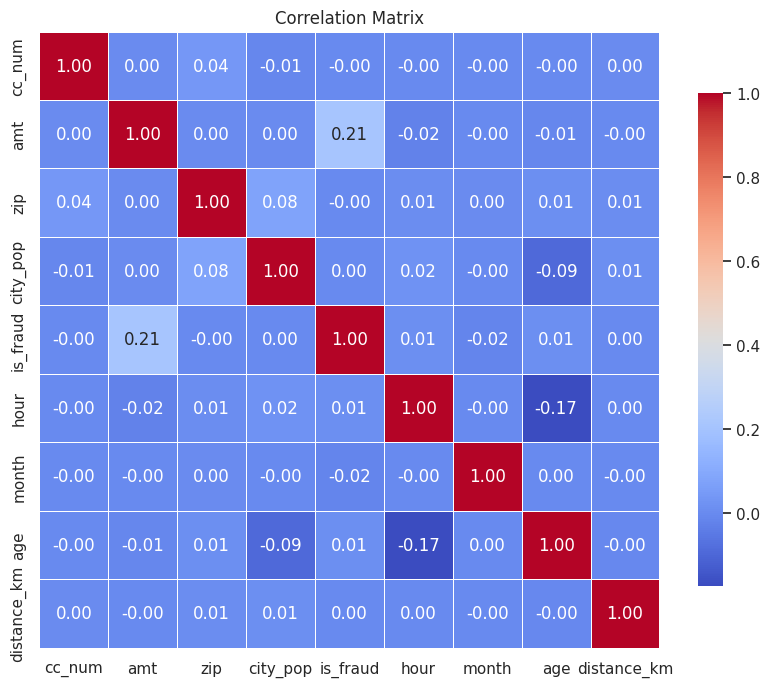

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check corr between numeric values
numeric_corr = df.select_dtypes(include='number').corr()

# Plot heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.show()

